<a href="https://colab.research.google.com/github/FatmaAouani/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the libraries

In [1133]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Loading the datasets

In [1134]:
df = pd.read_csv('titanic.csv')
dt = pd.read_csv('test.csv')
combined = [df, dt]
dtest = dt[['PassengerId']].copy()

#Data Exploration

## The train and test datasets

In [1135]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1136]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q


In [1137]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [1138]:
df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [1139]:
dt.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [1140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1141]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We will drop the Passenger ID and Ticket Number Columns

In [1142]:
print(df.shape, dt.shape, combined[0].shape, combined[1].shape)

(891, 12) (418, 11) (891, 12) (418, 11)


In [1143]:
df = df.drop(['PassengerId', 'Ticket'], axis=1)
dt = dt.drop(['PassengerId', 'Ticket'], axis=1)
combined = [df, dt]

In [1144]:
print(df.shape, dt.shape, combined[0].shape, combined[1].shape)

(891, 10) (418, 9) (891, 10) (418, 9)


##Correlation Analysis

In [1145]:
#corr_matrix = df.corr(method="pearson").abs()
#sorted_mat = corr_matrix.unstack().sort_values()
#print(sorted_mat)

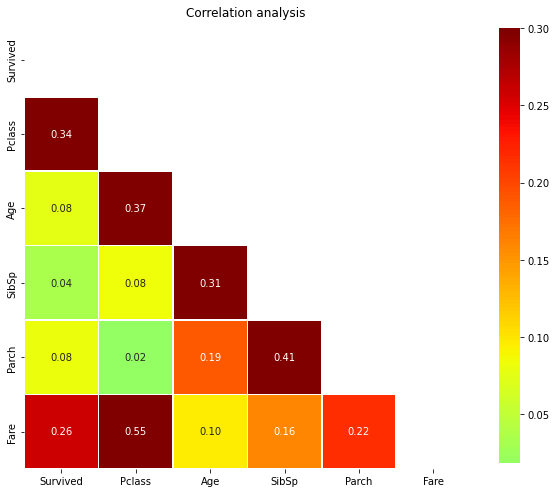

In [1146]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis ');

Survival according to  Age:

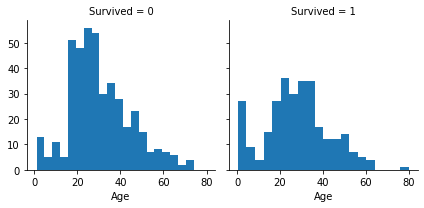

In [1147]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Survival according to Ticket Class:

In [1148]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Survival according to Sex:

In [1149]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Survival according to Sex and Ticket Class:

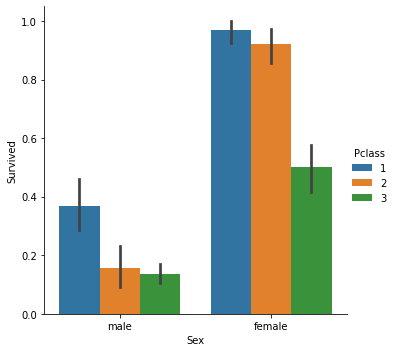

In [1150]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df)

Survival according to Family Size ( Siblings and parents/children):

In [1151]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [1152]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Survival and Ticket class according to the Embarked Port:

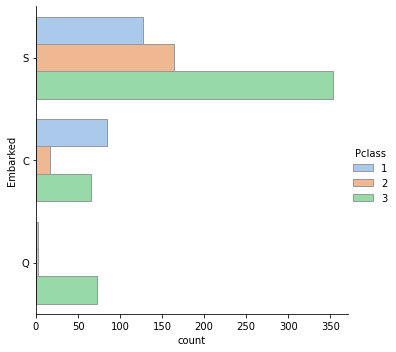

In [1153]:
sns.catplot(y="Embarked", hue="Pclass", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

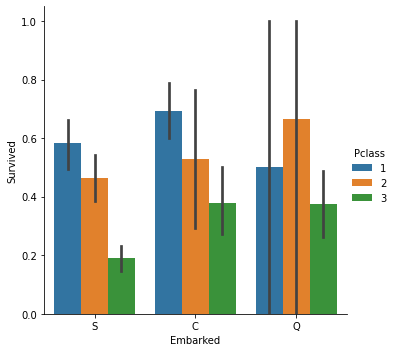

In [1154]:
sns.catplot(x="Embarked", y="Survived", hue="Pclass", kind="bar", data=df)

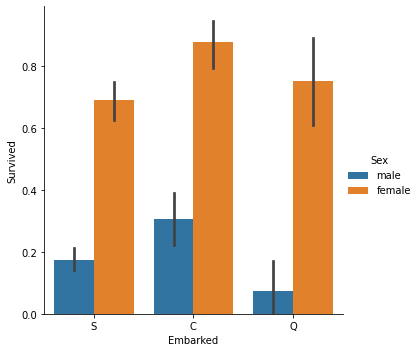

In [1155]:
sns.catplot(x="Embarked", y="Survived", hue="Sex", kind="bar", data=df)

##Vizualizing the missing data

In the Training Set:

In [1156]:
missing_values=df.isnull().sum()
print(missing_values)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [1157]:
missing_values=df.isnull().sum()
missingvp = 100*(missing_values)/891
print(missingvp)

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


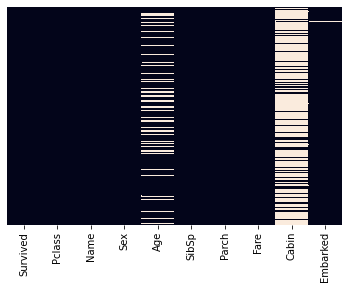

In [1158]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False)

<Figure size 720x432 with 0 Axes>

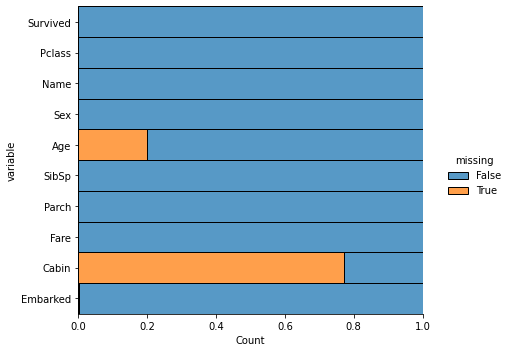

In [1159]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In the Test Set:

In [1160]:
missing_values=dt.isnull().sum()
print(missing_values)

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64


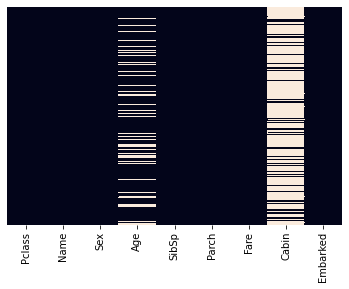

In [1161]:
sns.heatmap(dt.isna(),yticklabels=False,cbar=False)

# Feature Engineering

## Family Size

We will add Family Size Feature to the dataset:

In [1162]:
for dataset in combined:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


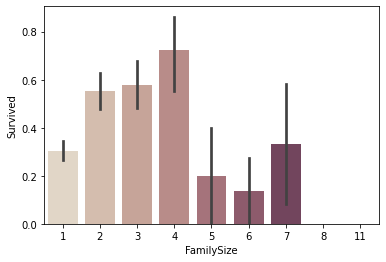

In [1163]:
sns.barplot(x="FamilySize", y="Survived", palette="ch:.25", data=df)

Since the distribution is variable amongst the family sizes, we can create a feature showing if the passenger is alone or not. But we won't do that in this example. The code would be:

    for dataset in combined:
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

    df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()




In [1164]:
for dataset in combined:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


##Titles from the Names of the passengers

We will extract the titles from the names and categorize them.

In [1165]:
for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [1166]:
for dataset in combined:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


## Cabin 

We will replace the cabin numbers by the first letter in each string.

In [1167]:
#df1 =df_conc.loc[df_conc['Pclass'] == 1]
#print(df1['Cabin'])

In [1168]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df['Cabin'] = df['Cabin'].replace('n', 'Z')

dt['Cabin'] = dt['Cabin'].astype(str).str[0]
dt['Cabin'] = dt['Cabin'].replace('n', 'Z')

combined = [df, dt]

print(df["Cabin"])

0      Z
1      C
2      Z
3      C
4      Z
      ..
886    Z
887    B
888    Z
889    C
890    Z
Name: Cabin, Length: 891, dtype: object


## Ticket Fare

In [1169]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dt[['Fare']])

dt['Fare'] = imputer.transform(dt[['Fare']])

combined = [df, dt]

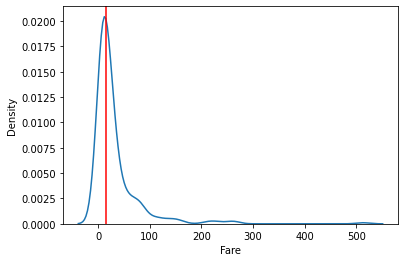

In [1170]:
xmedian = np.median(df["Fare"])
sns.kdeplot(x="Fare", data=df)
plt.axvline(xmedian, c='red')
plt.show()

## Age of the passengers

There is a more fancy way than the one we used in imputing missing age values. We can create a model predicting ages based on other variables. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...
The code for this is below. But we will use imputation by mean of the age in the dataset.





    for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

```
# This is formatted as code
```



Then we would create age bands



    train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
    train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

```
# This is formatted as code
```



In [1171]:
imputer.fit(df[['Age']])

df['Age'] = imputer.transform(df[['Age']])
dt['Age'] = imputer.transform(dt[['Age']])

combined = [df, dt]

##Embarked

Imputing the 2 missing values with the mode of the feature.

In [1172]:
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer2.fit(df[['Embarked']])

dt['Embarked'] = imputer2.transform(dt[['Embarked']])

combined = [df, dt]

In [1173]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    object 
 2   Sex         418 non-null    object 
 3   Age         418 non-null    float64
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Fare        418 non-null    float64
 7   Cabin       418 non-null    object 
 8   Embarked    418 non-null    object 
 9   FamilySize  418 non-null    int64  
 10  IsAlone     418 non-null    int64  
 11  Title       418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


##Label encoding for the categorical features:

In [1174]:
df_conc = pd.concat([df, dt], axis=0, join='inner')
df_conc = df_conc.drop(['Name', 'SibSp', 'Parch', 'FamilySize'], axis=1)
X_conc = df_conc.iloc[: , :].values

In [1175]:
df_conc.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,IsAlone,Title
0,3,male,22.0,7.2500,Z,S,0,Mr
1,1,female,38.0,71.2833,C,C,0,Mrs
2,3,female,26.0,7.9250,Z,S,1,Miss
3,1,female,35.0,53.1000,C,S,0,Mrs
4,3,male,35.0,8.0500,Z,S,1,Mr


In [1176]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

X_conc[:, 1] = labelencoder.fit_transform(X_conc[:, 1])
X_conc[:, 4] = labelencoder.fit_transform(X_conc[:, 4])
X_conc[:, 7] = labelencoder.fit_transform(X_conc[:, 7])
X_conc[:, 5] = labelencoder.fit_transform(X_conc[:, 5])

In [1177]:
X_conc[0]

array([3, 1, 22.0, 7.25, 8, 2, 0, 2], dtype=object)

Alternative way to impute directly on "combined" dataset:

    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    for dataset in combine:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)

    train_df.head()



##OneHotEncoding for Categorical Data

In [1178]:
df_conc.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,IsAlone,Title
0,3,male,22.0,7.2500,Z,S,0,Mr
1,1,female,38.0,71.2833,C,C,0,Mrs
2,3,female,26.0,7.9250,Z,S,1,Miss
3,1,female,35.0,53.1000,C,S,0,Mrs
4,3,male,35.0,8.0500,Z,S,1,Mr


In [1179]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,4,5,6] )],remainder='passthrough')
X_conc = np.array(ct.fit_transform(X_conc))

In [1180]:
ct2 = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1] )],remainder='passthrough')
X_conc = np.array(ct2.fit_transform(X_conc))

In [1181]:
print(X_conc[0])

[0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 1.0 0.0 1.0 0.0 22.0 7.25]


## Splitting Data and Applying Standard Scaling to the Continuous Features

In [1182]:
X_train = X_conc[0:891 , :]
X_test = X_conc[891: , :]
y_train = df['Survived'].values

In [1183]:
print(X_train)

[[0.0 0.0 1.0 ... 0.0 22.0 7.25]
 [0.0 0.0 0.0 ... 0.0 38.0 71.2833]
 [0.0 1.0 0.0 ... 1.0 26.0 7.925]
 ...
 [0.0 1.0 0.0 ... 0.0 29.69911764705882 23.45]
 [0.0 0.0 1.0 ... 1.0 26.0 30.0]
 [0.0 0.0 1.0 ... 1.0 32.0 7.75]]


In [1184]:
print(X_test)

[[0.0 0.0 1.0 ... 1.0 34.5 7.8292]
 [0.0 0.0 0.0 ... 0.0 47.0 7.0]
 [0.0 0.0 1.0 ... 1.0 62.0 9.6875]
 ...
 [0.0 0.0 1.0 ... 1.0 38.5 7.25]
 [0.0 0.0 1.0 ... 1.0 29.69911764705882 8.05]
 [1.0 0.0 0.0 ... 0.0 29.69911764705882 22.3583]]


In [1185]:
print(y_train)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [1186]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, -2:] = sc.fit_transform(X_train[:, -2:])
X_test[:, -2:] = sc.transform(X_test[:, -2:])

In [1187]:
print(X_train)

[[0.0 0.0 1.0 ... 0.0 -0.5924805998028886 -0.5024451714361915]
 [0.0 0.0 0.0 ... 0.0 0.638789012042525 0.7868452935884467]
 [0.0 1.0 0.0 ... 1.0 -0.2846631968415352 -0.4888542575852478]
 ...
 [0.0 1.0 0.0 ... 0.0 4.374348392294584e-15 -0.1762632390135436]
 [0.0 0.0 1.0 ... 1.0 -0.2846631968415352 -0.0443810379414236]
 [0.0 0.0 1.0 ... 1.0 0.17706290760049492 -0.49237782784289985]]


In [1188]:
print(X_test)

[[0.0 0.0 1.0 ... 1.0 0.36944878445134083 -0.4907831606177225]
 [0.0 0.0 0.0 ... 0.0 1.3313781687055704 -0.5074788432328373]
 [0.0 0.0 1.0 ... 1.0 2.4856934298106457 -0.4533668714188949]
 ...
 [0.0 0.0 1.0 ... 1.0 0.6772661874126942 -0.5024451714361915]
 [0.0 0.0 1.0 ... 1.0 4.374348392294584e-15 -0.4863374216869249]
 [1.0 0.0 0.0 ... 0.0 4.374348392294584e-15 -0.19824427701513647]]


In [1189]:
len(X_train)

891

In [1190]:
len(y_train)

891

# Training the Models

## Comparing Different ML models

In [1209]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y_train

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train, y_train, cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, y_train)
    #MLA_predict[MLA_name] = alg.predict(X_train)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.921161,0.833209,0.05687,0.09886
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.897191,0.830597,0.068311,0.050659
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.851873,0.822761,0.042257,0.062325
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.878652,0.81791,0.055022,0.162757
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.862547,0.813806,0.067248,0.00158
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.990262,0.81194,0.073096,0.14349
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.830712,0.80709,0.057309,0.596206
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.85206,0.803358,0.056427,0.29055
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.82603,0.802985,0.078166,0.068521
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.823221,0.8,0.066828,0.005336


Text(0, 0.5, 'Algorithm')

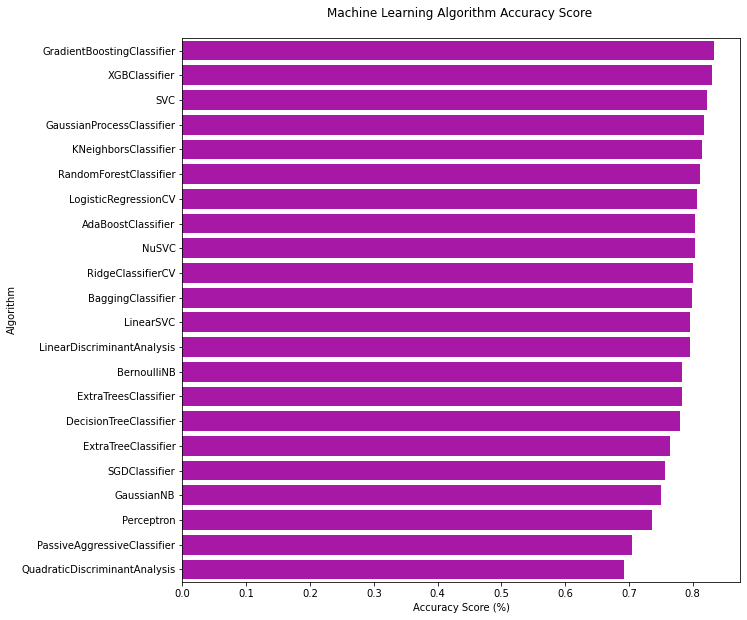

In [1212]:
plt.figure(figsize=(10,10))
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [1214]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier( loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, 
                                    max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
classifier.fit(X_train, y_train)


GradientBoostingClassifier()

In [1215]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [1216]:
df2 = pd.DataFrame(y_pred, columns=['Survived'])
dtest = pd.concat([dtest, df2], axis=1)
print(dtest)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [1217]:
dtest.to_csv('results.csv', index=False)